In [1]:
from src.data_loader import get_combined_data, data_preprocessing

from src.classes.COMBINED_DYAD_YEAR_SEQ_CLUSTER_class import COMBINED_DYAD_YEAR_SEQ_CLUSTER
from src.classes.DYAD_YEAR_SEQ_CLUSTER_class import DYAD_YEAR_SEQ_CLUSTER
from src.clustering import (plot_cluster, 
                            plot_cluster_summary,
                            build_numeric_feature_cluster)

import numpy as np

/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/consulting_venv/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


# 0. Get Data

In [2]:
df = get_combined_data()
df_africa = data_preprocessing(df)

df_africa.head()

/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/src/data_loader.py:159: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  ucdp_df = pd.read_csv(ucdp_path)


,event_id_cnty,event_date,year,time_precision,disorder_type,actor1,actor2,actor1_id,actor2_id,latitude,...,forest_gc,herb_gc,shrub_gc,urban_gc,water_gc,mountains_mean,rainseas,ttime_mean,dist_border_km_2004,dist_capital_km_2004
0,DRC31402,2023-12-31 00:00:00,2023,1,Political violence,Rioters (Democratic Republic of Congo),NaN,00001,00001,-6.1500,...,6.101852,0.317901,5.641975,0.0,0.000000,0.0,11.0,147.50917,197.57076,904.80680
1,BFO11325,2023-12-31 00:00:00,2023,1,Political violence,JNIM: Group for Support of Islam and Muslims,NaN,00002,00002,12.9871,...,0.893855,1.585972,0.117939,0.0,0.080695,0.0,6.0,235.47472,180.74571,94.08883
2,BFO11326,2023-12-31 00:00:00,2023,1,Political violence,JNIM: Group for Support of Islam and Muslims,Military Forces of Burkina Faso (2022-),00002,00024,13.4417,...,5.561729,31.466050,0.000000,0.0,0.027778,0.0,6.0,411.62473,62.89616,215.85773
3,GAB472,2023-12-31 00:00:00,2023,2,Demonstrations,Protesters (Gabon),NaN,00003,00003,0.3901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHA2083,2023-12-31 00:00:00,2023,2,Political violence,Rioters (Ghana),NaN,00004,00004,7.7254,...,21.685184,0.000000,21.756172,0.0,32.021606,0.0,6.0,342.38196,35.02734,248.70784


# 1. Build Sequences

### Basic Dyad based Sequences

In [3]:
dyad_year_seq_cluster = DYAD_YEAR_SEQ_CLUSTER(df_africa)
dyad_year_sequences= dyad_year_seq_cluster.extract_sequences(df_africa, index = 'month_year')

In [4]:
comb_dyad_year_seq_cluster = COMBINED_DYAD_YEAR_SEQ_CLUSTER(df_africa, index = 'month_year')
comb_dyad_year_sequences= comb_dyad_year_seq_cluster.extract_sequences(df_africa)

Total nodes: 19189
Total edges: 5531
Total small sequences in subnetwork: 3090


### Combined Dyad based Sequences

# 3. Normalize Sequences

In [5]:
normalization_config = {
    'fatalities': 'proportional',
    'event_id_cnty': 'proportional', 
    'time': 'relative_steps',
    'temporal_curve': 'fatality_curve',
    'temporal_curve_integral': 'integral',
    'n_bins': 20,
    'binning_method': 'temporal',
    'curve_type': 'cumulative',
}

In [6]:
dyad_year_seq_cluster.apply_normalization(normalization_config)
#comb_dyad_year_seq_cluster.apply_normalization(normalization_config)

In [7]:
k = 5

In [8]:
dyad_year_seq_cluster = build_numeric_feature_cluster(k=10,sequences=dyad_year_seq_cluster, metric="dist_capital_km_2004", reducer=np.nansum, trim=0.0, method='quantile')


Binning completed with 10 clusters
  Cluster 0: 125 sequences (10.1%) range [0.00, 1239.92]
  Cluster 1: 124 sequences (10.0%) range [1239.92, 2281.22]
  Cluster 2: 124 sequences (10.0%) range [2281.22, 3441.24]
  Cluster 3: 124 sequences (10.0%) range [3441.24, 4754.01]
  Cluster 4: 124 sequences (10.0%) range [4754.01, 6539.23]
  Cluster 5: 124 sequences (10.0%) range [6539.23, 8683.38]
  Cluster 6: 124 sequences (10.0%) range [8683.38, 12394.59]
  Cluster 7: 124 sequences (10.0%) range [12394.59, 19715.25]
  Cluster 8: 124 sequences (10.0%) range [19715.25, 34038.02]
  Cluster 9: 125 sequences (10.1%) range [34038.02, 232093.22]


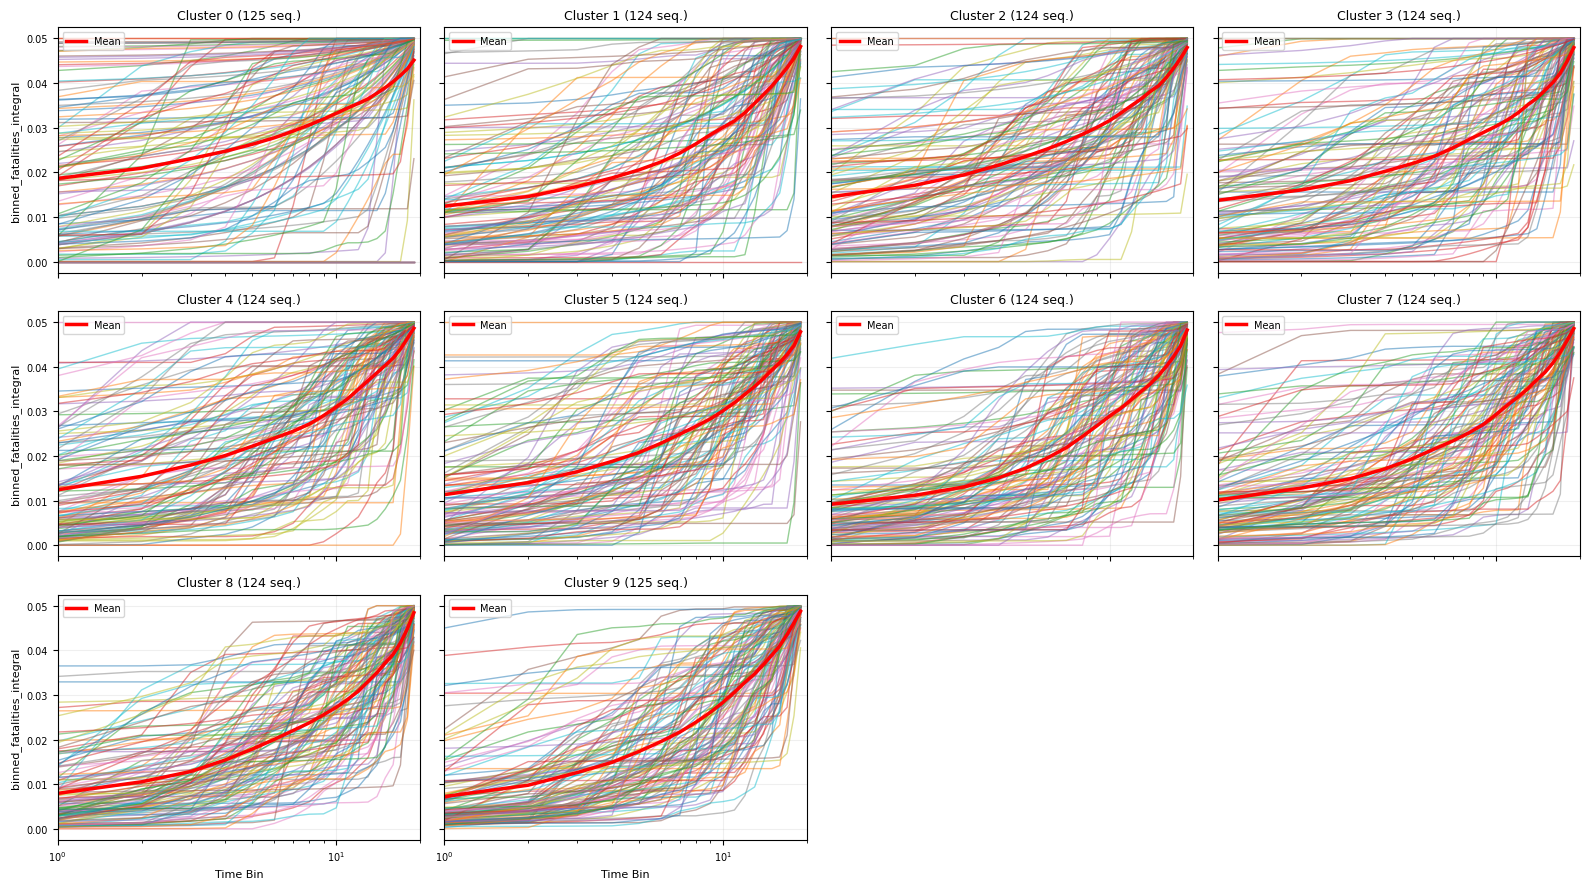

/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/src/clustering.py:509: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.26391825 0.59478506 0.03136011 0.10993658]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  disorder_counts.loc[disorder_counts['cluster_label']==cluster_label, 'relative_freq'] = cluster_data['frequency']/cluster_data['frequency'].sum()
/Users/sarahdeubner/PythonProjects/Consulting/Consulting-Conflict-Sequences-Africa/src/clustering.py:323: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


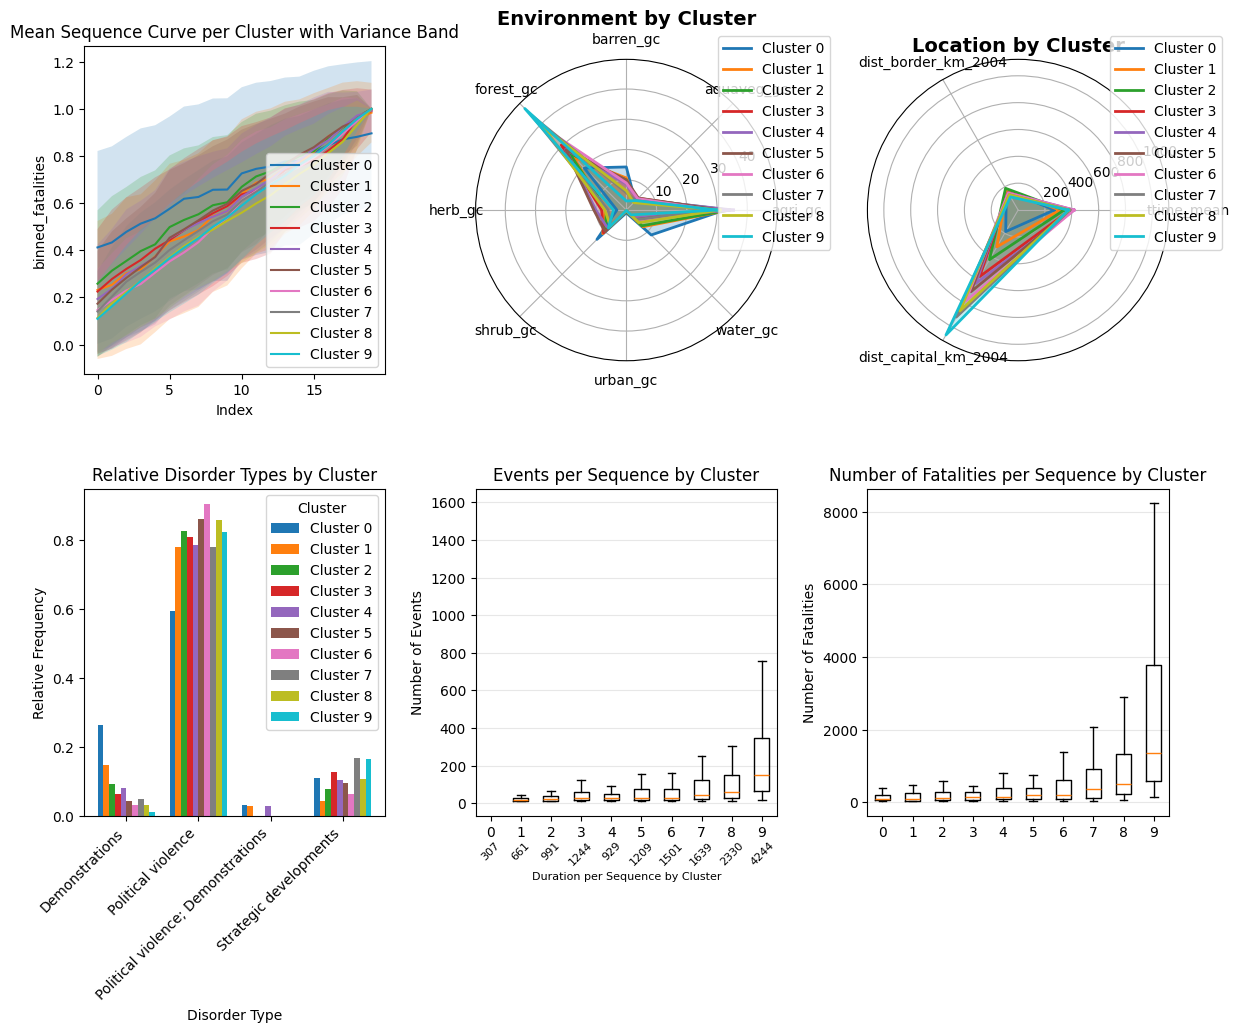

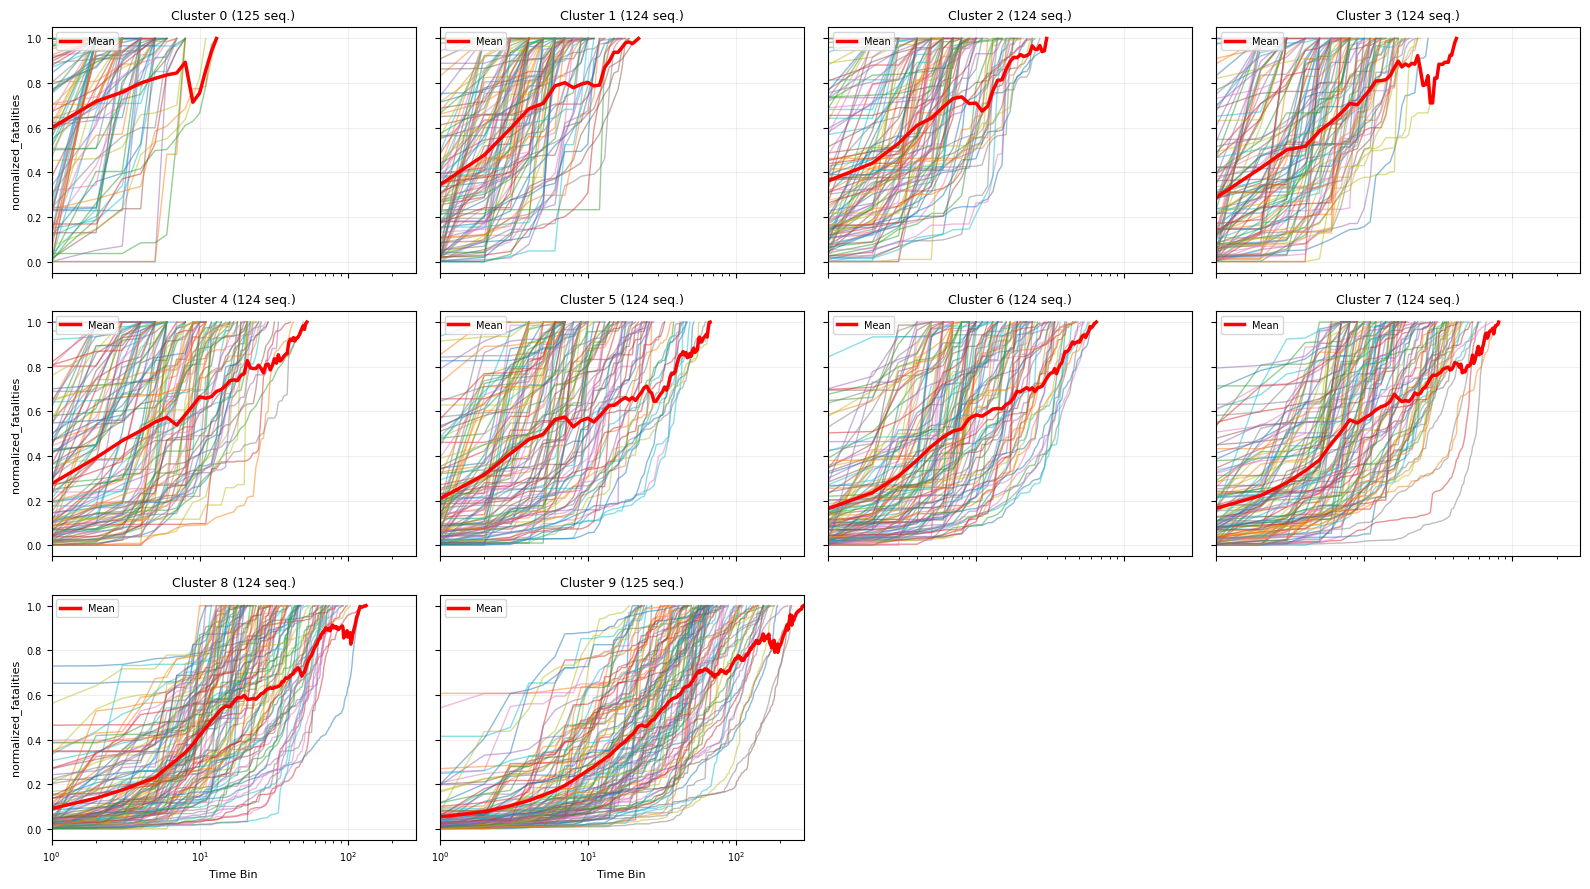

In [9]:
plot_cluster(dyad_year_seq_cluster, metric='binned_fatalities_integral')
plot_cluster_summary(dyad_year_seq_cluster,'binned_index', 'binned_fatalities')
plot_cluster(dyad_year_seq_cluster, metric='normalized_fatalities')